In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat

In [3]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
y_train = np.c_[data['y']]
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = np.c_[data['yval']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


In [5]:
y_train

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507],
       [ 2.12107248],
       [14.71026831],
       [ 2.61418439],
       [ 3.74017167],
       [ 3.73169131],
       [ 7.62765885],
       [22.7524283 ]])

In [6]:
X_train

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [7]:
Xval

array([[  1.        , -16.74653578],
       [  1.        , -14.57747075],
       [  1.        ,  34.51575866],
       [  1.        , -47.01007574],
       [  1.        ,  36.97511905],
       [  1.        , -40.68611002],
       [  1.        ,  -4.47201098],
       [  1.        ,  26.53363489],
       [  1.        , -42.7976831 ],
       [  1.        ,  25.37409938],
       [  1.        , -31.10955398],
       [  1.        ,  27.31176864],
       [  1.        ,  -3.26386201],
       [  1.        ,  -1.81827649],
       [  1.        , -40.7196624 ],
       [  1.        , -50.01324365],
       [  1.        , -17.41177155],
       [  1.        ,   3.5881937 ],
       [  1.        ,   7.08548026],
       [  1.        ,  46.28236902],
       [  1.        ,  14.61228909]])

In [8]:
yval

array([[ 4.17020201e+00],
       [ 4.06726280e+00],
       [ 3.18730676e+01],
       [ 1.06236562e+01],
       [ 3.18360213e+01],
       [ 4.95936972e+00],
       [ 4.45159880e+00],
       [ 2.22763185e+01],
       [-4.38738274e-05],
       [ 2.05038016e+01],
       [ 3.85834476e+00],
       [ 1.93650529e+01],
       [ 4.88376281e+00],
       [ 1.10971588e+01],
       [ 7.46170827e+00],
       [ 1.47693464e+00],
       [ 2.71916388e+00],
       [ 1.09269007e+01],
       [ 8.34871235e+00],
       [ 5.27819280e+01],
       [ 1.33573396e+01]])

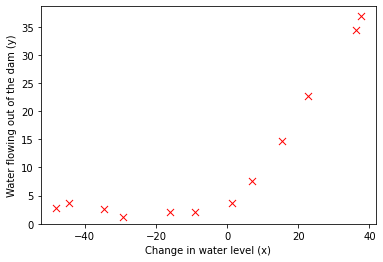

In [9]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [10]:
mean_ciw = sum((X_train[:,1]))/(len(X_train[:,1]))
mean_ciw

-5.085426348834809

In [11]:
mean_wfo = float(sum(y_train[:])/float((len(y_train[:]))))
mean_wfo

11.217589325366376

In [12]:
# calculating variance

def variance(values, mean):
    variance = 0
    for val in values:
        variance = float(variance + ((val-mean)**2))
    return variance

In [13]:
# A simple way to write the above def for variance
# def variance(values, mean):
#     return sum([(val-mean)**2 for val in values])
# variance(X_train[:,1], mean_ciw)

In [14]:
variance_ciw = variance(X_train[:,1], mean_ciw)
variance_ciw

9876.519270389965

In [15]:
variance_wfo = variance(y_train, mean_wfo)
variance_wfo

1872.8871778624105

In [41]:
# calculating covariance 

def covariance(inparm, output, mean_input, mean_output):
    covariance = 0
    for i in range(len(output)):
        covariance = (covariance + ((inparm[i] - mean_input)*(output[i] - mean_output)))
    return covariance

In [43]:
covariance_final = float(covariance(X_train[:,1], y_train[:], mean_ciw, mean_wfo))
covariance_final

3632.3786498320987

In [44]:
# Linear Fitting of parameters 
# guiding equation Y = mX+c
# slope(m), constant(c)
m = covariance_final/variance_ciw
c = mean_wfo - (m*mean_ciw)
m,c

(0.36777922974565086, 13.08790351086908)

In [45]:
# prediction
wfo = (m*float(input("enter the change in reservoir levels"))+c)
print('the predicted water flowing out from model =', wfo)

enter the change in reservoir levels-15.9367
the predicted water flowing out from model = 7.226716260181565
